In [13]:
%matplotlib inline
%load_ext nengo.ipynb

The nengo.ipynb extension is already loaded. To reload it, use:
  %reload_ext nengo.ipynb


With non orthogonal inputs some context updates don't happen. Also similarity profiles are not completely matching up.

In [14]:
import matplotlib.pyplot as plt
import nengo
import numpy as np
from nengo import spa

In [15]:
from imem.legacy.context import ThreeMemory
from imem.utils import inhibit_net

In [16]:
d = 64
beta = 0.6

rng = np.random.RandomState(seed=1)
vocab = spa.Vocabulary(d, rng=rng)

def stimulus(t):
    if t < 1.:
        return np.zeros(d)
    else:
        v = vocab.parse('InitStim').v
        for i in range(int(t)):
            v = np.sqrt(1. - beta**2) * v + beta * vocab.parse('IN' + str(i)).v
        return v
        #return vocab.parse('IN' + str(int(t))).v
    
def context_initialization(t):
    if t < .5:
        return vocab.parse('InitCtx').v
    else:
        return np.zeros(d)

-

In [17]:
with nengo.Simulator(model) as sim:
    sim.run(10.)

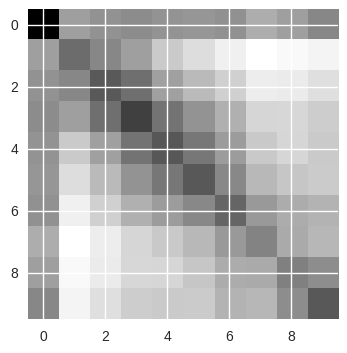

In [18]:
a = np.mean([sim.data[p_out][(1000 * i + 500):(1000 * i + 900)] for i in range(10)], axis=1)
plt.imshow(np.dot(a, a.T), interpolation='nearest')

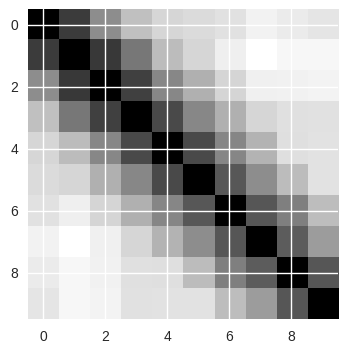

In [20]:
def stim(t):
    v = vocab.parse('InitStim').v
    for i in range(int(t)):
        v = np.sqrt(1. - beta**2) * v + beta * vocab.parse('IN' + str(i)).v
    return v

def ctx(t):
    v = vocab.parse('InitCtx').v
    for i in range(int(t)):
        v = np.sqrt(1. - beta**2) * v + beta * stim(t)
    return v

b = np.array([ctx(i) for i in range(10)])
b /= np.linalg.norm(b, axis=1)[:, None]
plt.imshow(np.dot(b, b.T), interpolation='nearest')

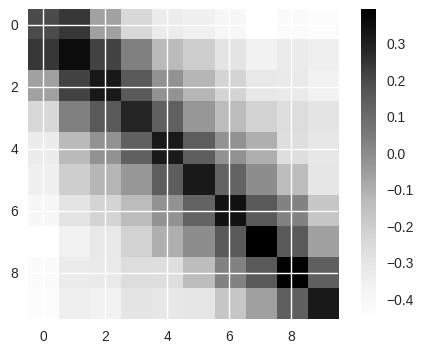

In [21]:
plt.imshow(np.dot(b, b.T) - np.dot(a, a.T), interpolation='nearest')
plt.colorbar()

In [22]:
def val(mat):
    a = np.zeros(2 * mat.shape[0] - 1)
    for i in range(mat.shape[0]):
        start = mat.shape[0] - i - 1
        end = mat.shape[0] - i - 1 + mat.shape[1]
        a[start:end] += mat[i, :]
    a /= mat.shape[0] - np.abs(mat.shape[0] - 1 - np.arange(2 * mat.shape[0] - 1))
    return a

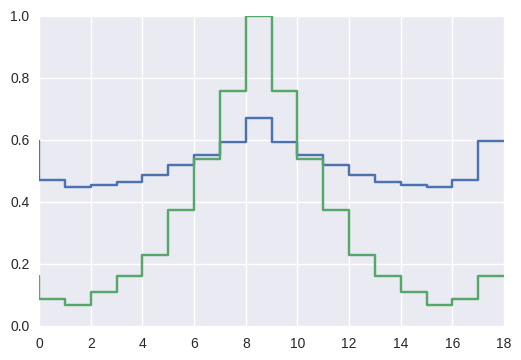

In [23]:
plt.step(range(19), val(np.dot(a, a.T)))
plt.step(range(19), val(np.dot(b, b.T)))

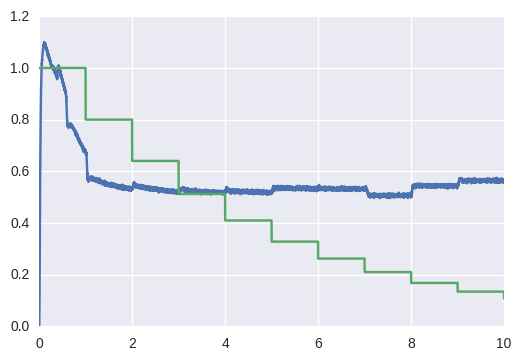

In [8]:
plt.plot(sim.trange(), np.dot(sim.data[p_out], vocab['InitCtx'].v))
plt.plot(sim.trange(), np.sqrt(1. - beta**2) ** np.floor(sim.trange()))

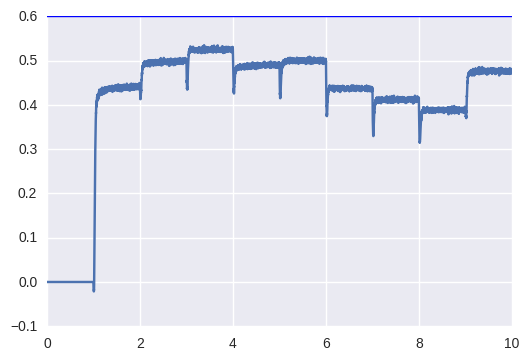

In [9]:
plt.plot(sim.trange(), np.sum(sim.data[p_out] * sim.data[p_in], axis=1))
plt.axhline(y=beta)

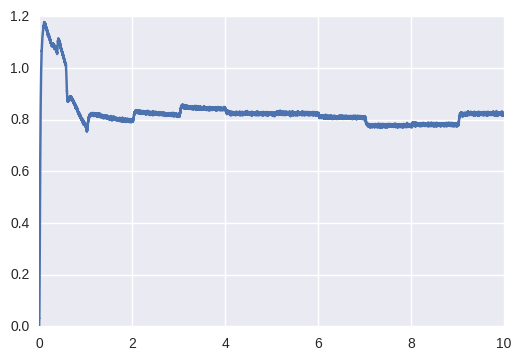

In [10]:
plt.plot(sim.trange(), np.linalg.norm(sim.data[p_out], axis=1))

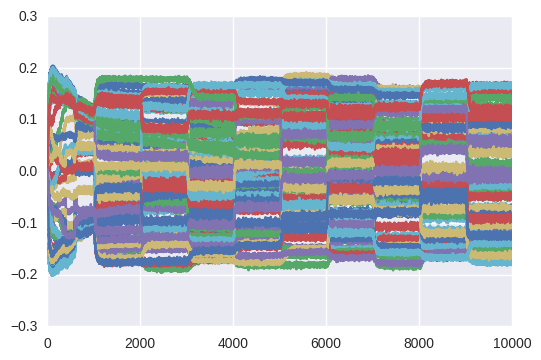

In [11]:
plt.plot(sim.data[p_out]);

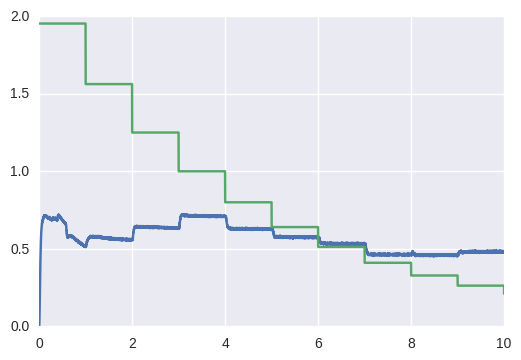

In [12]:
plt.plot(sim.trange(), np.dot(sim.data[p_out], sim.data[p_out][3500]))
plt.plot(sim.trange(), np.sqrt(1. - beta**2) ** np.floor(sim.trange() -3))